# Chicago Crime Classifier for Crimes Committed 


## Business and Data understanding

Business Understanding
1. **Project Background:**
The City of Chicago has been facing persistent issues related to crime, impacting the safety and well-being of its residents. With over 1.5 million crime reports recorded between 2015 and 2020, the sheer volume and complexity of the data make it challenging for law enforcement agencies to analyze and respond effectively to criminal activities. Utilizing advanced data analytics and machine learning techniques presents an opportunity to transform raw crime data into actionable insights, enhancing the city's ability to prevent and manage crime.

2. **Key Stakeholders:**
Law Enforcement Agencies: Primary users of the crime classifier, benefiting from data-driven insights to improve resource allocation, crime prevention strategies, and operational efficiency.

- City Government and Public Safety Officials: Utilize insights from the classifier to inform policy decisions, budget allocations, and community safety initiatives.

## Overview

Chicago, one of the largest cities in the United States, has a long history of grappling with crime. According to data from cityofchicago.org, the city experiences a wide range of criminal activities, including theft, assault, burglary, and drug-related offenses. The dataset, which spans from beggining of 2024 to the present, reveals that certain types of crime are more prevalent in specific neighborhoods and times, highlighting the complexity and diversity of criminal behavior in the city. For instance, theft and drug-related crimes are among the most frequently reported incidents.


## Challanges

- **High Crime Rates:** Despite various efforts by law enforcement, certain areas of Chicago continue to experience high crime rates, affecting residents' quality of life and safety.
- **Resource Allocation:** Efficiently allocating police resources is challenging due to the unpredictable nature of crimes and the vast geographical area of the city.
- **Crime Prevention:** Developing effective crime prevention strategies requires detailed insights into crime patterns, which can be difficult to analyze manually given the large volume of data
- **Public Perception and Trust:** High crime rates can erode public trust in law enforcement, making community cooperation in crime prevention efforts more difficult.


## Proposed solution
The proposed solution involves developing a crime classifier using machine learning techniques to analyze and predict criminal activities in Chicago. By leveraging historical crime data, the classifier can identify patterns and trends, enabling law enforcement agencies to allocate resources more effectively and implement proactive measures. 

## Brief conclusion
The implementation of a crime classifier for Chicago has the potential to significantly enhance the city's ability to combat crime. By leveraging data-driven insights, law enforcement can make more informed decisions, allocate resources more efficiently, and develop targeted crime prevention strategies. This approach not only aims to reduce crime rates but also to restore public trust and improve the overall safety and quality of life for Chicago's residents.

## Problem statement
The city of Chicago faces a persistent challenge of high crime rates and inefficient resource allocation for crime prevention. The unpredictability and diversity of criminal activities make it difficult for law enforcement agencies to effectively combat crime and ensure public safety.


## Objectives
- **Analyze Crime Data:** Conduct a comprehensive analysis of historical crime data to identify patterns and trends.
- **Develop a Crime Classifier:** Build and train machine learning models to classify and predict criminal activities based on historical data.
- **Evaluate Model Performance:** Assess the accuracy and effectiveness of different models to determine the best approach for crime prediction.
- **Enhance Resource Allocation:** Use the insights gained from the classifier to optimize the allocation of police resources and improve response strategies.
- **Improve Crime Prevention:** Develop proactive measures and targeted strategies to prevent crime and enhance public safety in Chicago.

## Data Understanding

The chicago crime data is got from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data

The city of Chicago portal for the year 2024

It contains features such as 
Here are the columns that I have chosen to include (after carefully eliminating a few others):

- Date: This column represents the timestamp of the incident. From this column, I have extracted the Month, Day, and Hour information. We can also add additional time-based columns such as Week and Day of the Week, among others.
- Block: This column provides a partially redacted address where the incident occurred, indicating the same block as the actual address.
- IUCR: The acronym stands for Illinois Uniform Crime Reporting. This code is directly linked to the Primary Type and Description. You can find more information about it in this link.
- Primary Type: This column describes the primary category of the IUCR code mentioned above.
- Description: This column provides a secondary description of the IUCR code, serving as a subcategory of the primary description.
- Location Description: Here, you can find the description of the location where the incident took place.
- Arrest: This column indicates whether an arrest was made in relation to the incident.
- Domestic: It shows whether the incident was domestic-related, as defined by the Illinois Domestic Violence Act.
- Beat: The beat refers to the smallest police geographic area, with each beat having a dedicated territory. You can find more information about it in this link.
- District: This column represents the police district where the incident occurred.
- Ward: It refers to the number that labels the City Council district where the incident took place.
- Community Areas: This column indicates the community area where the incident occurred. Chicago has a total of 77 community areas.
- FBI Code: The crime classification outlined in the FBI's National Incident-Based Reporting System (NIBRS).
- X-Coordinate, Y-Coordinate, Latitude, Longitude, Location: These columns provide information about the geographical coordinates of the incident location, including latitude and longitude. The "Location" column contains just the latitude and longitude coordinates.
- Year, Updated On: These columns represent the year of the incident and the date on which the dataset was last updated.

## Data preparation

### Importing necessary libraries

In the following cell, we are importing several libraries that we will use throughout this notebook. Libraries like `numpy` and `pandas` are fundamental for data manipulation and analysis. `matplotlib` and `seaborn` are used for data visualization.`sklearn` provides tools for data mining and data analysis.

In [95]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import logisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data overview

Define classes for data loading, preparation and cleaning

In [96]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        
    #Load data from CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print("Data loaded successfully.")
    
        
    def display_head(self, n=5):
        print(self.data.head(n))

    # describe data
    def describe_data(self):
        print(self.data.describe().transpose())
    
    # Provide info about the DataFrame.
    def info_data(self):
        print(self.data.info())

    # check missing values
    def check_missing_values(self):
        print(self.data.isnull().sum())
        
    # Drop missing values
    def drop_missing_values(self):
        self.data.dropna(inplace=True)
        return self.data

    # Check for duplicate rows in the DataFrame.
    def check_duplicates(self):
        duplicates = self.data.duplicated()
        print(f"Number of duplicate rows = {duplicates.sum()}")
        
       

# execution:
file_path = 'Crimes_-_2024_20240607.csv'
data_loader = DataLoader(file_path)
data_loader.load_data()
data_loader.display_head()
data_loader.describe_data()
data_loader.check_missing_values()
data_loader.check_duplicates()


Data loaded successfully.
         ID Case Number                    Date                   Block  IUCR  \
0  13477487    JH283625  05/29/2024 12:00:00 AM    034XX W DIVERSEY AVE  0820   
1  13477597    JH284632  05/29/2024 12:00:00 AM  011XX S CALIFORNIA AVE  0820   
2  13476431    JH283168  05/29/2024 12:00:00 AM      036XX W AINSLIE ST  1330   
3  13478047    JH285292  05/29/2024 12:00:00 AM       060XX W GRAND AVE  2826   
4  13477155    JH284171  05/29/2024 12:00:00 AM       002XX S WACKER DR  1330   

        Primary Type                     Description  \
0              THEFT                  $500 AND UNDER   
1              THEFT                  $500 AND UNDER   
2  CRIMINAL TRESPASS                         TO LAND   
3      OTHER OFFENSE  HARASSMENT BY ELECTRONIC MEANS   
4  CRIMINAL TRESPASS                         TO LAND   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0              DEPARTMENT STORE   False     False  ...    35          

We can see that we have a few missing values on Location such as , X and Y coordinate latitude,longitude and location each missing 86 values. Location Description 396

In [97]:
data_loader.info_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99534 entries, 0 to 99533
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    99534 non-null  int64  
 1   Case Number           99534 non-null  object 
 2   Date                  99534 non-null  object 
 3   Block                 99534 non-null  object 
 4   IUCR                  99534 non-null  object 
 5   Primary Type          99534 non-null  object 
 6   Description           99534 non-null  object 
 7   Location Description  99138 non-null  object 
 8   Arrest                99534 non-null  bool   
 9   Domestic              99534 non-null  bool   
 10  Beat                  99534 non-null  int64  
 11  District              99534 non-null  int64  
 12  Ward                  99534 non-null  int64  
 13  Community Area        99534 non-null  int64  
 14  FBI Code              99534 non-null  object 
 15  X Coordinate       

The dataset has 99534 rows and 21 columns

Lets remove the missing values.

In [98]:
data_loader.drop_missing_values()
data_loader.check_missing_values()


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [99]:
# Create a new DataFrame once missing values are dropped
cleaned_data = data_loader.data

cleaned_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13477487,JH283625,05/29/2024 12:00:00 AM,034XX W DIVERSEY AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,False,False,...,35,22,06,1153078.0,1918408.0,2024,06/05/2024 03:41:03 PM,41.931963,-87.712876,POINT (-87.712876373 41.931962854)
1,13477597,JH284632,05/29/2024 12:00:00 AM,011XX S CALIFORNIA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,True,...,28,29,06,1157861.0,1895062.0,2024,06/05/2024 03:41:03 PM,41.867803,-87.695937,POINT (-87.695936906 41.867803094)
2,13476431,JH283168,05/29/2024 12:00:00 AM,036XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False,...,33,14,26,1151380.0,1932317.0,2024,06/05/2024 03:41:03 PM,41.970164,-87.718750,POINT (-87.718749784 41.970163724)
3,13478047,JH285292,05/29/2024 12:00:00 AM,060XX W GRAND AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,36,19,26,1135571.0,1914247.0,2024,06/05/2024 03:41:03 PM,41.920874,-87.777312,POINT (-87.777312117 41.92087423)
4,13477155,JH284171,05/29/2024 12:00:00 AM,002XX S WACKER DR,1330,CRIMINAL TRESPASS,TO LAND,COMMERCIAL / BUSINESS OFFICE,True,False,...,42,32,26,1173971.0,1899133.0,2024,06/05/2024 03:41:03 PM,41.878631,-87.636673,POINT (-87.636673298 41.878630716)


A significant number of columns, such as crime IDs and their Case Numbers, are not usable since they are sequential data that only serve to represent crimes.

The IUCR, which is the Illinois Uniform Crime Reporting code, is linked to the Primary Type attribute. These codes and their meanings can be found via this link. The FBI Code is also a code assigned by the FBI to the crime:

Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

The detailed Description of the crime is not really usable in our context either, as is the date of the update of the information concerning the crime Updated On.

The Location attribute is a tuple of two elements that are the Latitude and Longitude that we already have as two separate attributes, so we can remove it.

The Year column is irrelevant as the dataset contains data for the year 2024 only.

X Coordinate and Y Coordinate represent the location where the crime occurred (as well as Latitude and Longitude) according to the State Plane Illinois East NAD 1983 projection. We can do without them since they circulate the same information as other attributes.

Finally, the Block attribute contains the partial address of the location where the crime took place in the form of a string. The attribute circulates many different values (even keeping only the street names, which we tried and then deleted to avoid adding too many cells to the notebook), so it is difficult to encode them into something usable. Therefore, we have decided to remove this attribute.

In the next cell, we remove the attributes mentioned above. But we also remove the rows that count null values with the dropna() function since the proportion of these rows is not large compared to the size of the entire dataset.

We then display the resulting DataFrame.

In [100]:
cleaned_data.drop(columns = ['ID', 'Case Number', 'Block', 'IUCR', 'Description', 'FBI Code',
                   'X Coordinate', 'Y Coordinate', 'Updated On', 'Location','Year'], inplace = True)
cleaned_data.dropna(inplace = True)
cleaned_data

,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,05/29/2024 12:00:00 AM,THEFT,DEPARTMENT STORE,False,False,1412,14,35,22,41.931963,-87.712876
1,05/29/2024 12:00:00 AM,THEFT,APARTMENT,False,True,1135,11,28,29,41.867803,-87.695937
2,05/29/2024 12:00:00 AM,CRIMINAL TRESPASS,APARTMENT,False,False,1712,17,33,14,41.970164,-87.718750
3,05/29/2024 12:00:00 AM,OTHER OFFENSE,APARTMENT,False,False,2512,25,36,19,41.920874,-87.777312
4,05/29/2024 12:00:00 AM,CRIMINAL TRESPASS,COMMERCIAL / BUSINESS OFFICE,True,False,122,1,42,32,41.878631,-87.636673
...,...,...,...,...,...,...,...,...,...,...,...
99529,01/01/2024 12:00:00 AM,DECEPTIVE PRACTICE,APARTMENT,False,False,1224,12,27,28,41.882917,-87.661073
99530,01/01/2024 12:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,True,834,8,18,70,41.736702,-87.720475
99531,01/01/2024 12:00:00 AM,THEFT,RESIDENCE,False,False,2234,22,21,75,41.687340,-87.649519
99532,01/01/2024 12:00:00 AM,OTHER OFFENSE,OTHER (SPECIFY),False,False,614,6,18,71,41.738088,-87.672845


We can see that we have reduced the number of columns to 12.

# Exploratory data analysis

Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [101]:
cat_cols = cleaned_data.select_dtypes(include=['object']).columns
num_cols = cleaned_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date', 'Primary Type', 'Location Description'], dtype='object')
Numerical Variables:
['Beat', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude']


Encode categorical features

### Univariate analysis for numerical values

Beat
Skew : 0.35


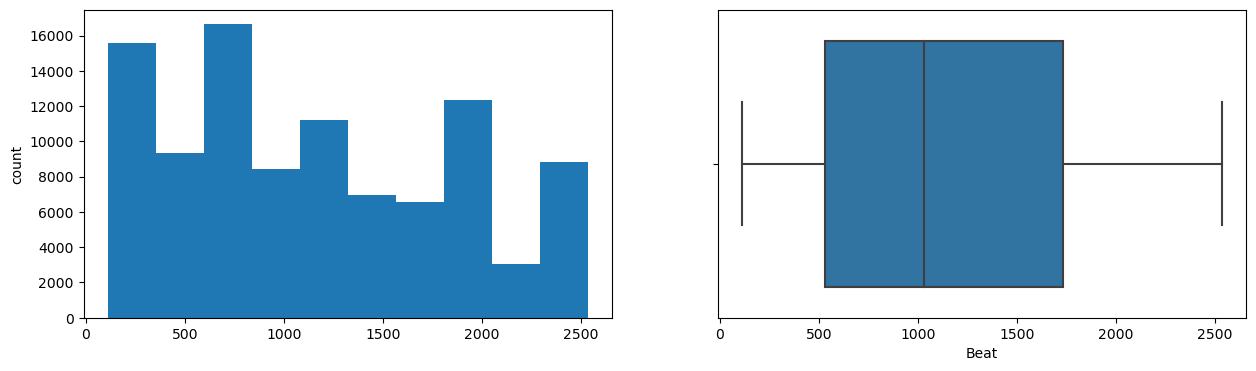

District
Skew : 0.36


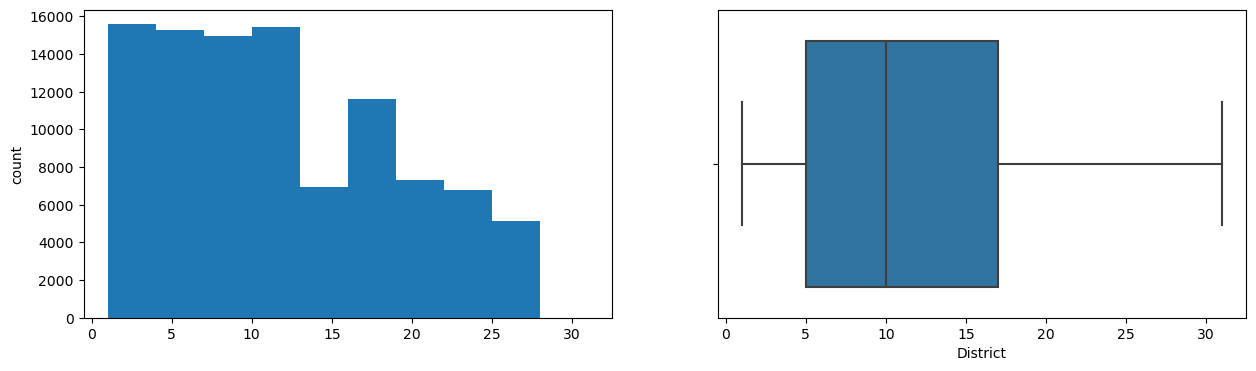

Ward
Skew : 0.19


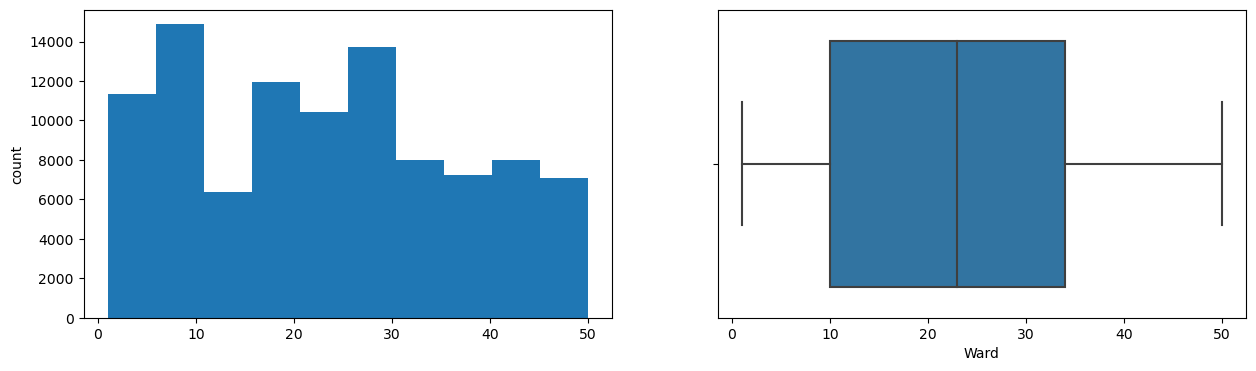

Community Area
Skew : 0.24


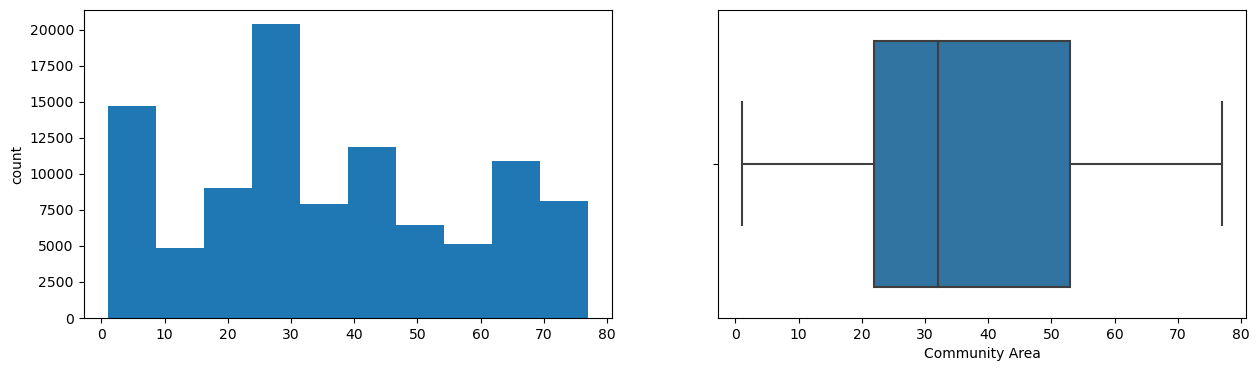

Latitude
Skew : -0.1


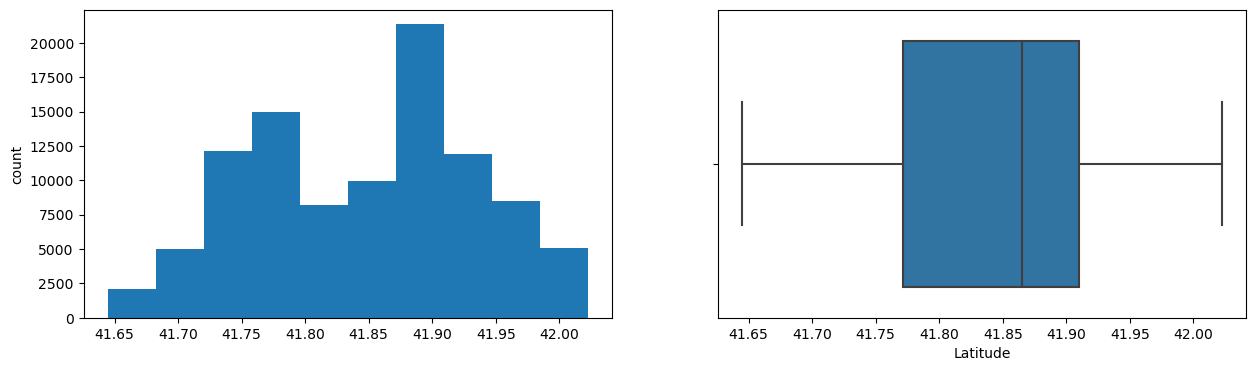

Longitude
Skew : -0.4


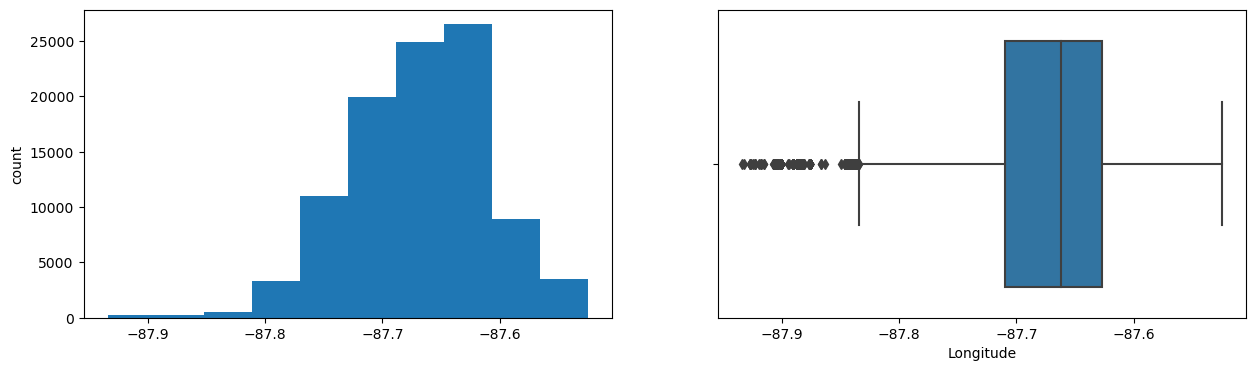

In [102]:
for col in num_cols:
    print(col)
    print('Skew :', round(cleaned_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cleaned_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[col])
    plt.show()


Observations

- Arrest is skewed to the left as there are less arrests made
- all the other numerical features have little skewness ranging between -0.4 to 0.4
- we have a few ouliers in x coordinate and longitude

### Univariate analysis for categorical values

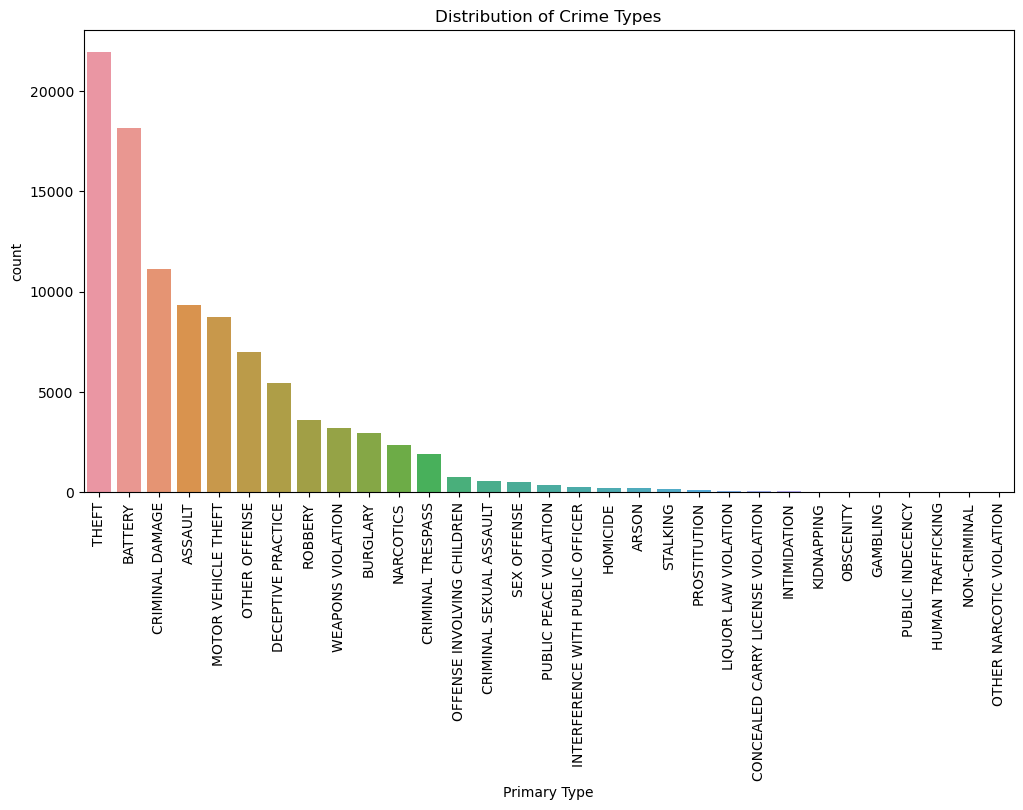

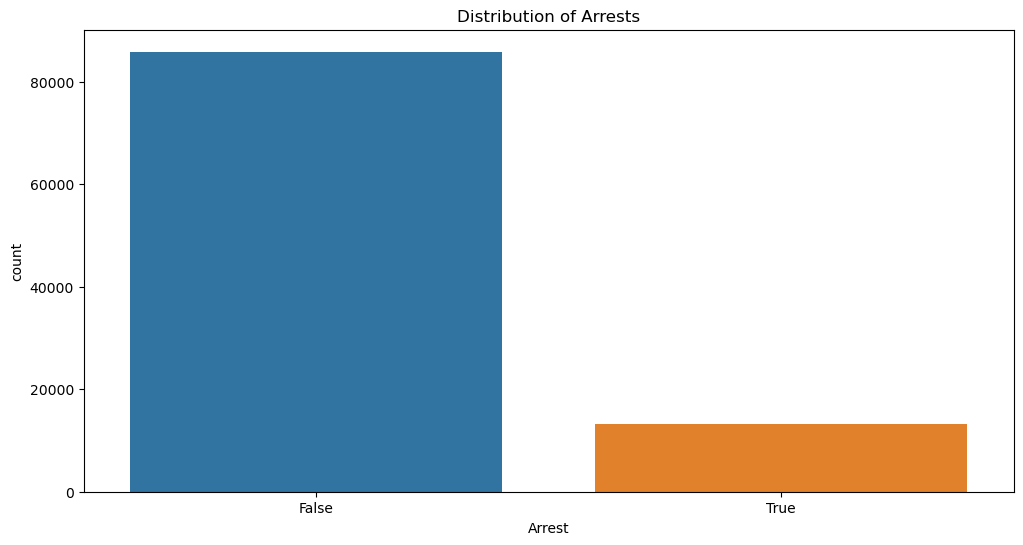

In [103]:
# Plotting distributions of some key features
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', data=cleaned_data, order=cleaned_data['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Arrest', data=cleaned_data)
plt.title('Distribution of Arrests')
plt.show()



Observations
- Most crimes happen on the streets
- Theft is the leading crime followed by battery


Given the difficulties encountered in using Primary Type directly for our models, we have decided to perform Hand Engineering of a new attribute that would be more balanced and more representative of crimes.

After some research, notably in the [*Criminal Code*](https://www.ilga.gov/legislation/ilcs/ilcs3.asp?ChapterID=53&ActID=1876) of the Illinois Compiled Statutes (ILCS), we found that we could put these types of crimes into 3 major categories:

- Offenses directed against the person (ODATP)
- Offenses directed against property (ODAP)
- Offenses affecting public health, safety and decency/affecting governmental functions (OAPHSD)

We have placed these types of crimes in each of the categories as follows:

**Offenses directed against the person**: Battery, Assault, Offense involving children, Sex Offense, Crim Sexual Assault, Homicide, Prostitution, Stalking, Kidnapping, Intimidation, Human Trafficking.

**Offenses directed against property:** Theft, Deceptive Practice, Burglary, Motor Vehicle theft, Robbery, Arson.

**Offenses affecting public health, safety and decency/Gov func:** Narcotics, Weapons Violation, Public Peace Violation, Interference with Public Officer, Liquor Law Violation, Concealed Carry License Violation, Gambling, Obscenity, Public Indecency, Other Narcotic Violation.

**Crimes of the type:** Other Offense, Criminal Damage and Criminal Trespass are deleted as they represent a mix of categories.

**Lines with the type:** Non-Criminal, Non-Criminal (Subject Specified) and Non - Criminal are not taken into account.

Finally, the only line with the crime type Ritualism will also be deleted due to the lack of examples.

All of this is done in the next cells:

Additional Notes:

In [104]:
cleaned_data = cleaned_data[~cleaned_data['Primary Type'].isin(["OTHER OFFENSE", "CRIMINAL DAMAGE", "CRIMINAL TRESPASS", "NON-CRIMINAL",
                                 "NON-CRIMINAL (SUBJECT SPECIFIED)", "NON - CRIMINAL", "RITUALISM"])]

In [105]:
print("Number of crimes in the category 'Offenses directed against the person' :",
      len(cleaned_data[cleaned_data['Primary Type'].isin(["BATTERY", "ASSAULT", "OFFENSE INVOLVING CHILDREN", "SEX OFFENSE", "HOMICIDE",
                                      "CRIM SEXUAL ASSAULT", "PROSTITUTION", "STALKING", "KIDNAPPING",
                                      "INTIMIDATION", "HUMAN TRAFFICKING"])]))
print("Number of crimes in the category 'Offenses directed against property' :",
      len(cleaned_data[cleaned_data['Primary Type'].isin(["THEFT", "DECEPTIVE PRACTICE", "BURGLARY", "MOTOR VEHICLE THEFT", "ROBBERY",
                                      "ARSON"])]))
print("Number of crimes in the category 'Offenses affecting public health, safety and decency/affecting governmental functions' :",
      len(cleaned_data[cleaned_data['Primary Type'].isin(["NARCOTICS", "WEAPONS VIOLATION", "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION",
                                      "CONCEALED CARRY LICENSE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER",
                                      "GAMBLING", "OBSCENITY", "PUBLIC INDECENCY", "OTHER NARCOTIC VIOLATION"])]))

Number of crimes in the category 'Offenses directed against the person' : 29296
Number of crimes in the category 'Offenses directed against property' : 42834
Number of crimes in the category 'Offenses affecting public health, safety and decency/affecting governmental functions' : 6373


We are creating a new column called Category that our models will try to predict.

In [106]:
cleaned_data.insert(1, "Category", -1)

We associate 0, 1, or 2 to the ODATP, ODAP, or OAPHSD categories, respectively.

In [107]:
cleaned_data.loc[cleaned_data['Primary Type'].isin(["BATTERY", "ASSAULT", "OFFENSE INVOLVING CHILDREN", "SEX OFFENSE", "HOMICIDE",
                "CRIM SEXUAL ASSAULT", "CRIMINAL SEXUAL ASSAULT", "PROSTITUTION", "STALKING", "KIDNAPPING",
                "INTIMIDATION", "HUMAN TRAFFICKING"]), 'Category'] = 0
cleaned_data.loc[cleaned_data['Primary Type'].isin(["THEFT", "DECEPTIVE PRACTICE", "BURGLARY", "MOTOR VEHICLE THEFT", "ROBBERY",
                "ARSON"]), 'Category'] = 1
cleaned_data.loc[cleaned_data['Primary Type'].isin(["NARCOTICS", "WEAPONS VIOLATION", "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION",
                "CONCEALED CARRY LICENSE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER", "GAMBLING", "OBSCENITY",
                "PUBLIC INDECENCY", "OTHER NARCOTIC VIOLATION"]), 'Category'] = 2
cleaned_data

,Date,Category,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,05/29/2024 12:00:00 AM,1,THEFT,DEPARTMENT STORE,False,False,1412,14,35,22,41.931963,-87.712876
1,05/29/2024 12:00:00 AM,1,THEFT,APARTMENT,False,True,1135,11,28,29,41.867803,-87.695937
5,05/29/2024 12:00:00 AM,0,ASSAULT,STREET,False,False,1614,16,41,76,41.976763,-87.836614
6,05/29/2024 12:00:00 AM,0,BATTERY,RESIDENCE,False,True,2222,22,21,71,41.733387,-87.656915
7,05/29/2024 12:00:00 AM,1,THEFT,STREET,False,False,1925,19,46,6,41.946459,-87.644655
...,...,...,...,...,...,...,...,...,...,...,...,...
99527,01/01/2024 12:00:00 AM,1,DECEPTIVE PRACTICE,RESIDENCE,False,False,1621,16,45,12,42.010135,-87.782294
99529,01/01/2024 12:00:00 AM,1,DECEPTIVE PRACTICE,APARTMENT,False,False,1224,12,27,28,41.882917,-87.661073
99530,01/01/2024 12:00:00 AM,0,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,True,834,8,18,70,41.736702,-87.720475
99531,01/01/2024 12:00:00 AM,1,THEFT,RESIDENCE,False,False,2234,22,21,75,41.687340,-87.649519


We delete the Primary Type column and verify that we now have 3 crime categories.

This statement indicates that the Primary Type column, which originally contained the detailed crime type descriptions, will be removed from the DataFrame. This is done after creating the Category column, which now represents the simplified crime categories.

The purpose of removing the Primary Type column is to avoid redundancy and maintain a cleaner data structure. The Category column now serves as the primary representation of crime categories, and the models will be trained to predict these categories based on the other features in the DataFrame.

In [108]:
cleaned_data = cleaned_data.drop('Primary Type', axis=1)
cleaned_data['Category'].value_counts()

Category
1    42834
0    29850
2     6373
Name: count, dtype: int64

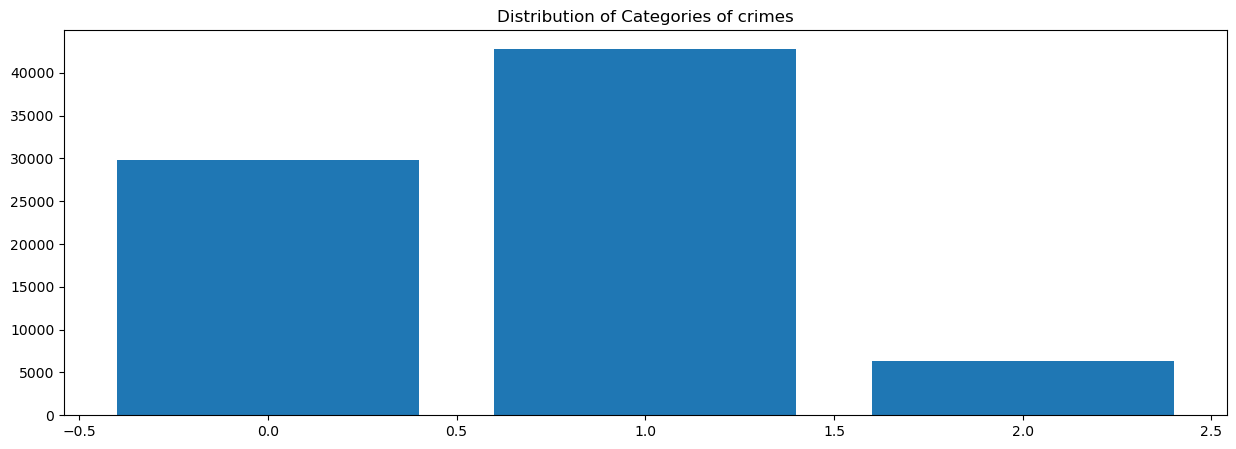

In [134]:
plt.figure(figsize=(15, 5))
plt.bar(cleaned_data['Category'].value_counts().index.tolist(),cleaned_data['Category'].value_counts())
plt.title('Distribution of Categories of crimes')
plt.show()

Although the examples for these categories are not very balanced (see barplot below), it is still rather acceptable and better than what we had before. In addition, it may be quite normal for our model to be biased towards the category of crimes that occur the most.

We discover the Location Description attribute in String format, which indicates where the crime took place.



In [110]:
print(cleaned_data['Location Description'].value_counts().to_string())

Location Description
STREET                                                   20727
APARTMENT                                                14832
RESIDENCE                                                 8386
SIDEWALK                                                  4643
SMALL RETAIL STORE                                        3424
PARKING LOT / GARAGE (NON RESIDENTIAL)                    2536
RESTAURANT                                                2089
DEPARTMENT STORE                                          2055
ALLEY                                                     1948
OTHER (SPECIFY)                                           1237
COMMERCIAL / BUSINESS OFFICE                              1148
RESIDENCE - PORCH / HALLWAY                               1085
VEHICLE NON-COMMERCIAL                                    1050
GAS STATION                                                991
GROCERY FOOD STORE                                         979
SCHOOL - PUBLIC BUILDING          

We are trying to see the number of arrests made by category:

This statement indicates that the goal is to analyze the number of arrests made for each of the three crime categories (ODATP, ODAP, and OAPHSD). This analysis can provide insights into the distribution of arrests across different types of crimes and help identify any potential patterns or biases in law enforcement practices.

In [111]:
cleaned_data[['Arrest', 'Category']].groupby('Category').sum()

,Arrest
Category,
0,4099
1,2158
2,4653


The different combinations for Beat, District, Ward, and Community Area:

In [112]:
cleaned_data[['Beat', 'District', 'Ward', 'Community Area']].value_counts()

Beat  District  Ward  Community Area
1831  18        42    8                 641
1834  18        42    8                 619
112   1         34    32                608
421   4         7     43                550
1121  11        27    23                475
                                       ... 
222   2         4     36                  1
532   5         10    51                  1
821   8         22    30                  1
921   9         12    61                  1
1023  10        28    30                  1
Name: count, Length: 793, dtype: int64

In [113]:
cleaned_data.head()

,Date,Category,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,05/29/2024 12:00:00 AM,1,DEPARTMENT STORE,False,False,1412,14,35,22,41.931963,-87.712876
1,05/29/2024 12:00:00 AM,1,APARTMENT,False,True,1135,11,28,29,41.867803,-87.695937
5,05/29/2024 12:00:00 AM,0,STREET,False,False,1614,16,41,76,41.976763,-87.836614
6,05/29/2024 12:00:00 AM,0,RESIDENCE,False,True,2222,22,21,71,41.733387,-87.656915
7,05/29/2024 12:00:00 AM,1,STREET,False,False,1925,19,46,6,41.946459,-87.644655


Next, we would like to focus on the Date attribute and make it more usable.

We extract from it the attributes Day, Month, and Hour, which can play an important role in predicting the category of crime that will occur based on time.

In [114]:
cleaned_data['Date']

0        05/29/2024 12:00:00 AM
1        05/29/2024 12:00:00 AM
5        05/29/2024 12:00:00 AM
6        05/29/2024 12:00:00 AM
7        05/29/2024 12:00:00 AM
                  ...          
99527    01/01/2024 12:00:00 AM
99529    01/01/2024 12:00:00 AM
99530    01/01/2024 12:00:00 AM
99531    01/01/2024 12:00:00 AM
99533    01/01/2024 12:00:00 AM
Name: Date, Length: 79057, dtype: object

In [115]:
# Convert the 'Date' column to datetime format
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Extract Month, Day, and Hour into new columns
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Day'] = cleaned_data['Date'].dt.day
cleaned_data['Hour'] = cleaned_data['Date'].dt.hour

# Display the dataframe with the new columns
cleaned_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15888\2039728213.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])


,Date,Category,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Day,Hour
0,2024-05-29,1,DEPARTMENT STORE,False,False,1412,14,35,22,41.931963,-87.712876,5,29,0
1,2024-05-29,1,APARTMENT,False,True,1135,11,28,29,41.867803,-87.695937,5,29,0
5,2024-05-29,0,STREET,False,False,1614,16,41,76,41.976763,-87.836614,5,29,0
6,2024-05-29,0,RESIDENCE,False,True,2222,22,21,71,41.733387,-87.656915,5,29,0
7,2024-05-29,1,STREET,False,False,1925,19,46,6,41.946459,-87.644655,5,29,0


Drop date column

In [116]:
cleaned_data = cleaned_data.drop('Date', axis=1)

We transform the boolean columns Arrest and Domestic into integers (0 for False and 1 for True).

In [117]:
cleaned_data['Arrest'] = cleaned_data['Arrest'].astype(int)
cleaned_data['Domestic'] = cleaned_data['Domestic'].astype(int)

Not having found a better way to exploit the Location Description attribute, I decided to simply encode it with an OrdinalEncoder() to transform the categorical values in this attribute into numerical representations.

In [118]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cleaned_data['Location Description'] = enc.fit_transform(cleaned_data[['Location Description']])

We shuffle our dataset randomly

In [119]:
cleaned_data = cleaned_data.sample(frac=1)
cleaned_data

,Category,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Month,Day,Hour
40173,2,104.0,1,0,2012,20,40,77,41.978227,-87.669670,3,31,12
22340,0,16.0,0,1,2413,24,50,2,41.994812,-87.682417,4,27,12
36871,0,23.0,0,0,231,2,3,40,41.794402,-87.620350,4,5,23
7062,0,16.0,0,1,114,1,42,32,41.886238,-87.615746,5,19,9
84631,1,54.0,0,0,124,1,28,28,41.868542,-87.639235,1,25,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32120,1,104.0,0,0,1214,12,27,28,41.886687,-87.654798,4,12,22
89875,1,16.0,0,0,831,8,16,66,41.773650,-87.691492,1,16,18
82046,0,101.0,0,0,334,3,7,43,41.758992,-87.566073,1,29,10
32239,1,88.0,0,0,2212,22,19,75,41.691414,-87.668826,4,12,19


### Check relationship between independent and dependent variables

### Multivariate analysis

The correlation matrix below shows that the attributes Beat, District, Ward, and Community Area are highly correlated (positively or negatively) with each other, as well as with Latitude and Longitude.

This is expected because these are all attributes that represent a location on a map.

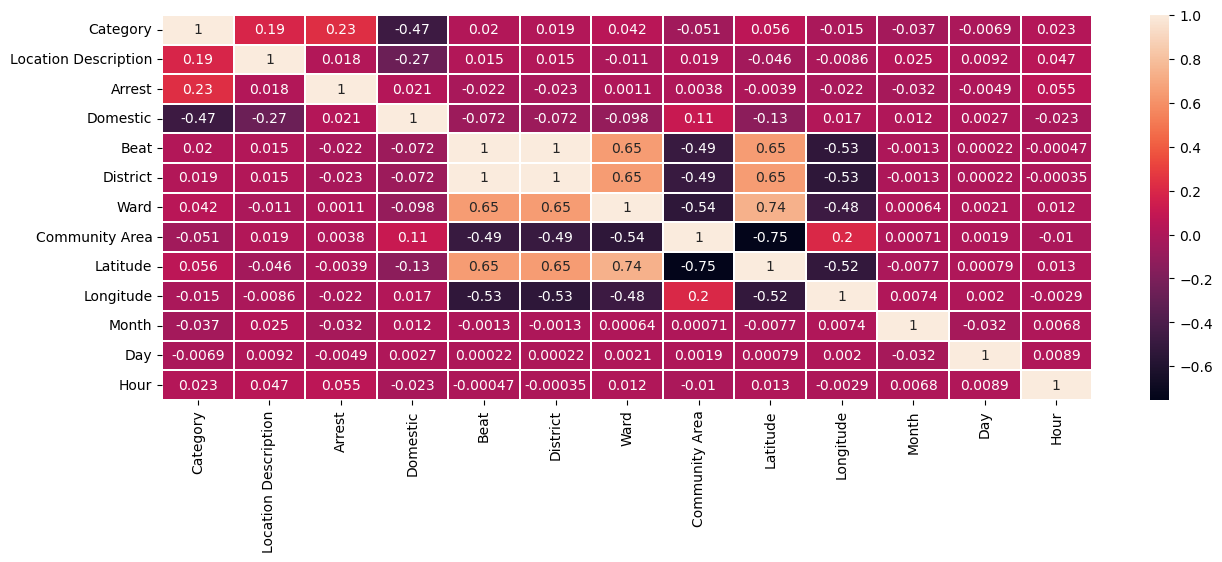

In [120]:
corr_matrix = cleaned_data.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(data = corr_matrix, annot=True, linewidths=0.2)
plt.show()

I have chosen to keep the District attribute, which has 22 distinct values, and remove the other attributes that carry similar information.

In [121]:
cleaned_data.drop(columns = ['Beat', 'Ward', 'Community Area'], inplace = True)
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data

,Category,Location Description,Arrest,Domestic,District,Latitude,Longitude,Month,Day,Hour
0,2,104.0,1,0,20,41.978227,-87.669670,3,31,12
1,0,16.0,0,1,24,41.994812,-87.682417,4,27,12
2,0,23.0,0,0,2,41.794402,-87.620350,4,5,23
3,0,16.0,0,1,1,41.886238,-87.615746,5,19,9
4,1,54.0,0,0,1,41.868542,-87.639235,1,25,16
...,...,...,...,...,...,...,...,...,...,...
79052,1,104.0,0,0,12,41.886687,-87.654798,4,12,22
79053,1,16.0,0,0,8,41.773650,-87.691492,1,16,18
79054,0,101.0,0,0,3,41.758992,-87.566073,1,29,10
79055,1,88.0,0,0,22,41.691414,-87.668826,4,12,19


# Modeling

Before starting modeling, and knowing that some models require preserving the entire dataset, we are aware that with our dataset containing over 90000 examples, some models would take an eternity to train on our resource-limited computers.

Therefore, we have decided to work on a sample (of 20,000 rows) of the original dataset that is as representative as possible of the initial dataset.

We use the sample function to sample the data. Then, we employ the Kolmogorov-Smirnov test to verify that the sampling process did not cause us to lose significant data.

To check this, we require that all p-values be at least greater than 5% (0.05).


In [144]:
from scipy.stats import ks_2samp

sample_size = 20000
subsample = cleaned_data.sample(sample_size, axis = 0, random_state=1)
pvalues = [None for _ in range(cleaned_data.shape[1])]
for col in range(cleaned_data.shape[1]) :
    # Using Kolmogorov-Smirnov test to check whether the sample truely represents the original dataset
    _, pvalues[col] = ks_2samp(cleaned_data.iloc[:,col], subsample.iloc[:,col])

pvalues

[0.791453588735378,
 0.6386675383956851,
 0.9999999819887615,
 1.0,
 0.9651962818424997,
 0.7166193118701658,
 0.8080277434843718,
 0.9656710385905658,
 0.729513699122436,
 0.6806110134390486]

We keep our original DataFrame in cleaned_legacy_data and the sample in cleaned_data

In [145]:
cleaned_legacy_data = cleaned_data
cleaned_data = subsample
cleaned_data.reset_index(drop=True, inplace=True)

I separate the attribute I want to predict, which contains the 3 classes of the dataset, and put it in the y variable, and the rest of the attributes in the X variable.

Then perform multiclass classification.

In [122]:
X = cleaned_data.drop('Category', axis=1)
y = cleaned_data['Category']

I created the training set (70%) and the test set (30%):

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 42)

We standardize our attributes using a StandardScaler to improve training performance and avoid numerical problems during gradient calculation and objective function optimization. (To prevent attributes from having very different scales.)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN 
We start with a K Nearest Neighbor model.

We choose the optimal n_neighbors hyperparameter using GridSearchCV.

We preferred to use the f1_weighted score (f1 score weighted by the class proportions in our dataset) for all our models since it is a score that better represents the performance during multiclass classification with an unbalanced dataset (which is our case).

In [125]:
# Use the "GridSearchCV" method to perform cross-validation of the k parameter of a kNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score


# Set the values of the hyperparameters to test
param_grid = {'n_neighbors':[13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

# Choose a score to optimize, here weighted f1-score (more significant than accuracy especially in multiclass)
score = 'f1_weighted'

# Create a kNN classifier with hyperparameter search by cross-validation
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, verbose = 1, scoring = score)

# Optimize this classifier on the training set
clf_results = knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [126]:
# Display the optimal hyperparameter(s).
print("Best parameters : {}".format(knn_grid.best_params_))
print("Best cross-validation score : {:.2f}".format(knn_grid.best_score_))

Best parameters : {'n_neighbors': 27}
Best cross-validation score : 0.71


In [127]:
# Display the corresponding performance
print("Cross-Validation Results :")
for mean, std, params in zip(
        knn_grid.cv_results_['mean_test_score'], # average score
        knn_grid.cv_results_['std_test_score'],  # std score
        knn_grid.cv_results_['params']           # hyperparameter value
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Cross-Validation Results :
f1_weighted = 0.704 (+/-0.005) for {'n_neighbors': 13}
f1_weighted = 0.707 (+/-0.005) for {'n_neighbors': 15}
f1_weighted = 0.707 (+/-0.003) for {'n_neighbors': 17}
f1_weighted = 0.708 (+/-0.003) for {'n_neighbors': 19}
f1_weighted = 0.707 (+/-0.004) for {'n_neighbors': 21}
f1_weighted = 0.709 (+/-0.005) for {'n_neighbors': 23}
f1_weighted = 0.709 (+/-0.004) for {'n_neighbors': 25}
f1_weighted = 0.710 (+/-0.006) for {'n_neighbors': 27}
f1_weighted = 0.710 (+/-0.004) for {'n_neighbors': 29}
f1_weighted = 0.710 (+/-0.004) for {'n_neighbors': 31}


Average Model Performance by Cross-Validation

We use the cross_validate function adapted to the multiclass case:

- Weighted precision
- Weighted recall
- Balanced accuracy
- Weighted F1 score
- ROC AUC with one vs rest and weighting

In [128]:
from sklearn.model_selection import cross_validate
scores_knn = cross_validate(knn_grid, X_train, y_train, cv=5,scoring=('precision_weighted','recall_weighted','balanced_accuracy','f1_weighted','roc_auc_ovr_weighted'))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


The performance of this model: (70.9%)

In [129]:
print("Cross-validation performance : {:.3f}".format(scores_knn['test_f1_weighted'].mean()))

Cross-validation performance : 0.709


## Random Forest

We move on to a Random Forest model.

We choose the optimal n_estimators and max_depth hyperparameters using RandomizedSearchCV this time.

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
 'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)],
 'max_depth': [int(x) for x in np.linspace(20, 100, num = 5)]}

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions = random_grid,
                               n_iter=50,
                               cv=5,
                               verbose=2,
                               random_state=1,
                               scoring='f1_weighted',
                               n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 40, 60, 80, 100],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=1, scoring='f1_weighted', verbose=2)

In [131]:
print("Best parameters : {}".format(rf_random.best_params_))
print("Best cross-validation score : {:.2f}".format(rf_random.best_score_))

Best parameters : {'n_estimators': 140, 'max_depth': 20}
Best cross-validation score : 0.76


In [139]:
scores_rf_random = cross_validate(rf_random, X_train, y_train, cv=3,
                    scoring=('precision_weighted','recall_weighted','balanced_accuracy','f1_weighted','roc_auc_ovr_weighted'))
print("Cross-validation performance : {:.3f}".format(scores_rf_random['test_f1_weighted'].mean()))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross-validation performance : 0.756


As expected, the Random Forest model performs slightly better than a KNN.

Calculation of the Average Model Performance by Cross-Validation

Then we display it: (75.60%)

## XGBoost



We now move on to a well-known model for its effectiveness: XGBoost.

The model has a large number of hyperparameters. We select the best combination of some of them for the values given in the param_dist dictionary, using RandomizedSearchCV once again.

We also use a KFold object this time to choose the number of folds on our training data that we will use for cross-validation in RandomizedSearchCV.

The objective function that we specify for the classifier in our multiclass case is 'multi:softmax'. The scoring is always with 'f1_weighted'. Finally, the evaluation metric (eval_metric) in the fit function is the 'multi log loss' (loss function).

In [148]:
import xgboost as xgb
import random
from scipy import stats
from sklearn.model_selection import KFold


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, objective='multi:softmax')
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=20, stop=200, num=10)],
    'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    'subsample': np.random.uniform(low=0.3, high=0.9, size=3).tolist(),
    'max_depth': [int(x) for x in np.linspace(20, 100, num=5)],
    'colsample_bytree': np.random.uniform(low=0.5, high=0.9, size=3).tolist()
}

numFolds = 3
kfold_5 = KFold(random_state=1, shuffle = True, n_splits = numFolds)

xgb_random = RandomizedSearchCV(xgb_clf, 
                         param_distributions = param_dist,
                         cv = kfold_5,
                         n_iter = 50,
                         scoring = 'f1_weighted', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

xgb_random.fit(X_train,y_train, eval_metric='mlogloss')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


h:\MORINGA\anaconda\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impor...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.60980260257233,
                                                             0.6153601500345791,
                                                             0.8693058013111807],
                                        'learning_rate': [0.001, 0.003, 0.01,
                                                          0.03, 0.1, 0.3],
                                        'max_depth': [20, 40, 60, 80, 100],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200],
                                        'subsample': [0.7633744443022432,
                                                      0.5901660593287321,
                                                      0.8113197920917392]},
                   scoring='f1_weighted', verbose=3)

In [149]:
print("Best parameters : {}".format(xgb_random.best_params_))
print("Best cross-validation score : {:.2f}".format(xgb_random.best_score_))

Best parameters : {'subsample': 0.7633744443022432, 'n_estimators': 140, 'max_depth': 100, 'learning_rate': 0.001, 'colsample_bytree': 0.8693058013111807}
Best cross-validation score : 0.76


Calculation of the Average Model Performance by Cross-Validation

Then we display it: (73.5%)

The XGBoost model performs almost no better than a Random Forest model. It is possible that the hyperparameters need more tuning, or that more data is needed (but to train this model it already takes about 15 minutes with our computational capabilities) or that the model has difficulty approaching the decision function because the data is close and it risks overfitting.

# Model Evaluation:
We now evaluate the selected model on the Test Set.

In [151]:
model = xgb_random

In [152]:
print("Test set score : {:.2f}".format(model.score(X_test, y_test)))

Test set score : 0.77


The model gives us a score of 74% on the test set, which is a very good start. The model generalizes well to data it has never seen before.

### Model Selection:

We will now select the model with the best performance by cross-validation, which is the XGBoost model.

In [153]:
model = xgb_random

Classification Report and Confusion Matrix:

              precision    recall  f1-score   support

       ODATP       0.79      0.63      0.70      8970
        ODAP       0.76      0.89      0.82     12828
      OAPHSD       0.79      0.61      0.69      1920

    accuracy                           0.77     23718
   macro avg       0.78      0.71      0.74     23718
weighted avg       0.77      0.77      0.77     23718



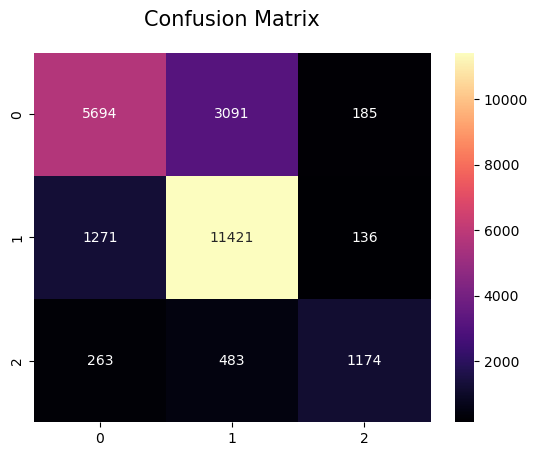

In [154]:
from sklearn import metrics

y_pred = model.predict(X_test)
target_names = ['ODATP', 'ODAP', 'OAPHSD']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap='magma')
plt.title('Confusion Matrix', y=1.05, size=15)
plt.show()

We observe below that the model has difficulty differentiating crimes in the ODATP category from the ODAP category and makes mistakes very often.